# Abstract

# Introduction
In this first project of the course we are looking at linear regression and resampling methods. The goal is to implement three methods for linear regression; Ordinary Least Squares, Ridge, and Lasso regression, and study their performance and behavior. Two types of resampling methods, namely the bootstrap and k-fold cross validation is used to better evaluate the method and to determine the optimal value for the relevent parameters.

We study two types of data. First we create synthetic data using the Franke function. This data is then used to explore and verify the models. After this we move on to real data, and in this project we will look at map data from [UCSG's EarthExplorer](https://earthexplorer.usgs.gov/), more specifically elevation. We explore how the models perform on this data

We will look at the performance of the models and study their biance variance trade off.

# Data
We create synthetic data using the Franke function, as well as real digital terrain data to explore our regression models. 
## The Franke function 
The Franke function is a two dimensional weighted sum of four exponentials. It has two Gaussian peaks of different heights, and a smaller dip and is often used as a test function in interpolation problems.

The function is defined as

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

and will be defined for $x,y\in [0,1]$. See figure (?) for a plot.

I have added some noise to this function, following a normal distribution, namely $\cal{N}(0,0.1)$.

## Real Data
We will use topological map data as real data for trying out our regression methods. I used EarthExplorer[1] to find a suitable map of elevation and chose an area over the Teton mountain range in Wyoming, USA. The map section had the enitityId SRTM1N43W111V3. I downloaded it as a GeoTIFF file with resolution of 1 arc second. A plot of this map is shown in figure (?)

# Methods
I explore three different methods for linear regression, as well as two methods for resampling. The model itself will be fit using a polynomial of variable degree, built from two input variables. 
## Regression Methods

### OLS
Ordinary Least Squares Regression (OLS) fits a linear model with coefficients $\beta_i$ to minimize the residual sum of squares between the output value (aka dependent or target variable) in the dataset, and the output as predicted by the linear approximation. With $\boldsymbol{X}$ as a matrix of the input variables, and $\boldsymbol{y}$ as the output or target, we approximate the target as

$$
\boldsymbol{\hat{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

So the goal of OLS is to find the optimal $\boldsymbol{\hat{\beta}}$ that minimizes the difference between the values $\boldsymbol{\hat{y}}$ and $\boldsymbol{y}$. 

Defining the loss function to quantify  this difference, or spread, as:

$$
L(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=1}^{n}\left(y_i-\hat{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\hat{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\hat{y}}\right)\right\},
$$

We want to minimize this function, and by taking the derivative of $L$ with respect to the individual $\boldsymbol{\beta_j}$ and solving for $\boldsymbol{\beta}$ we find the solution 

$$
\boldsymbol{\hat{\beta}} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

that can be used to calculate $\boldsymbol{\hat{\beta}}$.

From an new input $\boldsymbol{X_{a}}$ we can use the found $\boldsymbol{\hat{\beta}}$ to calculate an estimate or prediction for the target $\boldsymbol{y_a}$, $\boldsymbol{\hat{y_a}}$.



### Ridge regression
Both ridge regression and the lasso are so called shrinkage methods. Named due to how they shring the contribution from selected coefficients $\boldsymbol{\beta}$. 

Ridge regression modifies OLS by putting a restriction on the size of the individual coefficients $\boldsymbol{\beta}$. This is particularly useful in models with many (partly correlated) input values. The coefficients are then likely to become poorly determined, with high variance.

To combat this behavior ridge regression adds a penalty term to the loss function from the OLS model penalizing large beta values. The penalty is equivalent to the square of the magnitude of the coefficients. More succintly the ridge model adds L2 regularization to the OLS model.

starting with the expression from the above section, 

$$
L_{OLS}(\boldsymbol{\beta})=\sum_{i=1}^{n}\left(y_i-\hat{y}_i\right)^2=\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j^2)^2,
$$

a penalty term is added
$$
L(\boldsymbol{\beta})=\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j)^2+\sum_{j=1}^{p}\beta_j^2.
$$

subject to

$$
\sum_{j=1}^{p} \beta_j^2 \leq t,
$$

where $t$ is a positive number.

In matrix notation

$$
L(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

From which we get an expression for the coefficients, $\boldsymbol{\beta}^{\texttt{ridge}}$

$$
\boldsymbol{\beta}^{\texttt{ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$


where $\boldsymbol{I}$ is the $\texttt{p×p}$ identity matrix. The parameter $\lambda$ is often called a regularization parameter or hyperparameter.

We can see from this that for $\boldsymbol{\lambda}=0$ this model reduces to OLS. The bigger the value of $\boldsymbol{\lambda}$, the stricter the restriction on the size of the $\boldsymbol{\beta}$ values. In this way the ridge regression model can reduce model complexity, and thereby hopefully reduce overfitting. Large values of $\lambda$ can conversely lead to underfitting.


### Lasso regression
Like ridge regression, lasso (least absolute shrinkage and selection operator) regression adds a penalty to the loss function. We say lasso performs L1 regularization by adding a penalty equivalent to the absolute value of the magnitude of the coefficients.

The loss function becomes 

$$
L(\boldsymbol{\beta})=\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j)^2+\sum_{j=1}^{p}|\beta_j|.
$$

subject to

$$
\sum_{j=1}^{p} |\beta_j| \leq t,
$$

this constraint makes the solutions nonlinear in $\boldsymbol{y}$ meaning that there is no closed form expression for the lasso, unlike in ridge regression.

The coefficients $\boldsymbol{\hat{\beta}^{\texttt{lasso}}}$ are given by

$$
\boldsymbol{\hat{\beta}^{\texttt{lasso}}} = {\displaystyle \min_{\boldsymbol{\beta}}}\bigg( \sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j)^2+\lambda\sum_{j=1}^{p}|\beta_j| \bigg)
$$

## Resampling
Resampling methods are in essence methods for efficiently using the (often limited) data available to gain insight about the data. They are among other things used to estimate the precision of sample statistics on the data and for model validation. We will be focusing on this latter application. In essenxe, resampling methods work by using the (training) data available, and repeatedly drawing samples from this set and refitting the model of interest on each sample in order to obtain additional information about this model. 

We have looked at two resampling methods:
* The bootstrap method, and

* k-fold cross-validation

### The Bootstrap
Bootstrapping is a method which uses resampling with replacement on the available dataset, in essence using the available data as a pdf for the data. For each sample the model is fitted using the sample, and relevand measures are calculated, for instance the mean square error. This process is repeated B times. For the standard bootstrap, a sample of $n$ data points are drawn for a dataset (training set) of size $n$.

The bootstrap does not make assumptions about the underlying distribution of the data and is a quite general method.
### k-Fold Cross Validation
Cross validation methods are a subset of resampling methods used mainly for model validation. They work by dividing up the available data, i.e. the training set, into a number of sections or *folds*, and then fitting the model on some of the data, and using the remaining data as a test set for validation.

In k-fold cross-validation the (shuffled) dataset is split into $k$ so-called folds, and $k-1$ folds are used for training or fitting the model, and the final fold is used to test the resulting model. This is repeated k times, until all of the folds have been used as test fold exactloy once. 


## Error measures
The $r^2$ score, also known as the coefficient of determination, is a common measure of how well a model is able to predict outcomes. It is defined as one minus the residual sum of squares, 

$$
\text{RSS} = \sum_{i=1}^{n}\left(y_i-\hat{y}_i\right)^2
$$ 

divided by the total sum of squares,

$$
\text{TSS} = \sum_{i=1}^{n}\left(y_i-{y}_{mean}\right)^2
$$

giving;

$$
r^2 = 1 - \frac{RSS}{TSS}
$$

Here values closer to 1 are better, with $r^2=1.0$ being the optimal model. It is worth noting that $r^2$ can take negative values.

The MSE is the mean of the square of the errors, or residual sum of squares:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^2
$$

and naturally values closer to zero are better.

## Preprocessing
Before a data analysis can begin is important to preprosess the data we are working on. This includes removing inconsistent and corrupted values, confirming completeness of the dataset and possibly removing highly corrolated features as well as outliers. It may also include selecting certain features from the dataset to focus on to reduce dimensionality.

In this project our data is either synthetic and as such well defined, or we use map data where the issues mentioned are not relevant concerns. What is most relevant in this assignment is scaling.
### Scaling
Many models are sensitive to the effective value range of the features or input data. There are several ways to employ scaling. One popular option is to adjust the data so each predictor has mean value equal to zero and a variance of one. Another option is to scale all the data points so each feature vector has the same euclidian lentgh. Yet another option is to scale the values to all lie between a given minimum and maximum value, typically zero and one. 
### Dividing the data set
A crucial step when trying to use regression to create a model based on a dataset is to divide up the dataset in at least two sets. This being a training set to train the model, and a test set to test it. In addition, if the size of the data set allows, one may also add a validation set for validating and fine tuning the model before tesing it on the test set. 

I will be dividing the data into training and test sets, and use cross validation in place of a separate validation test. I will be using a 75%/25% split between training and test data.

## Packages and Tools
While I have written my own code for the OLS and ridge regression models, as well as the bootstrap and kFold CV, I have used functionality from the library scikit-learn[3] for the lasso regression as well as for scaling and splitting the data set. This python library is based on numpy and and scipy, and contains a wide array of machine learning algorithms, including regression methods.

Other packages I've used is numpy[4] for array handling, matplotlib.pyplot[5] for plots and visualizations, and python's random module[6] for generating (pseudo) random numbers.

# Results

## Ordinary Least Squares
First out is the simpler of the regression methods, ordinary least squares, or OLS. I begin by creating some synthetic data using the Franke function. Note that the $n$ in this code is the number of unique data points in the x and y direction, but as I use numpy's meshgrid when creating data the actual number of datapoints is $n\times n$.

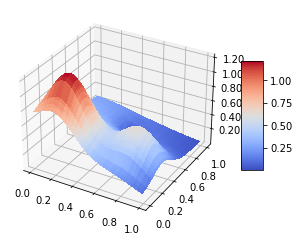

Figure 1: 3D plot of the Franke function


In [96]:
#
# Make data and preprocess
#

import Code.CreateData as cd

n = 100 # number of datapoints 
data = cd.CreateData(n,seed=8)
data.plot_data()
print("Figure 1: 3D plot of the Franke function")

Now I add some noise to this and see how it effects the data.

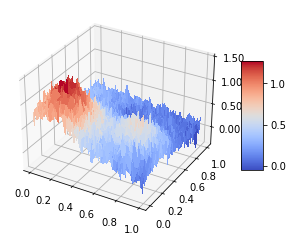

In [97]:
variance = 0.1
data.add_normal_noise(0,variance)
data.plot_data()

With this data I create a design matrix for a polynomial of degree $d=5$ to start. I split the data into training and test, scale it, and then I train my OLS model on the training data.

In [93]:
# Preprocessing data
degree = 5
test_fraction = 0.25
data.create_design_matrix(degree)
data.split_dataset(test_fraction)
data.scale_dataset(type='standard') # Using SciKit's StandardScaler

# Model
import Code.OrdinaryLeastSquares as ols
ols_model = ols.OrdinaryLeastSquares(seed=251)
ols_model.fit(data.X_train,data.z_train)


array([0.52318392, 0.38455936, 0.1889064 , ..., 0.11585749, 0.43133426,
       0.25477458])

I can try out my new model on the test set, and as a first look at accuracy I plot the prediction against the true values. Ideally this should produce a straight line.

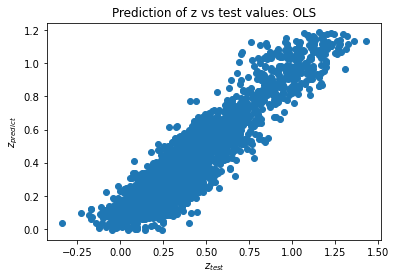

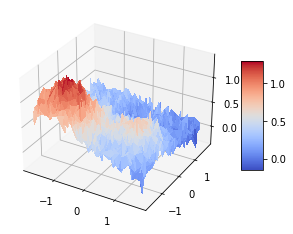

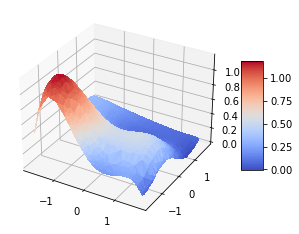

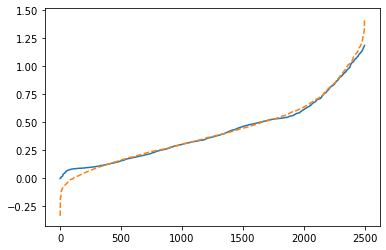

In [94]:
import matplotlib.pyplot as plt
z_hat = ols_model.predict(data.X_test)

plt.scatter(data.z_test, z_hat)
plt.title('Prediction of z vs test values: OLS')
plt.xlabel('$z_{test}$')
plt.ylabel('$z_{predict}$')

data.plot_data(data.X_test, data.z_test)
data.plot_data(data.X_test, z_hat)

# I can slo plot them together in the same plot
plt.plot(np.sort(z_hat))
plt.plot(np.sort(data.z_test),linestyle='dashed')

I see we get close to a straight line, and there is quite a bit of spread. Let us explore the model more rigorously. 

In [120]:
from numba import jit
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# move out of notebook?
def evaluate_model(model,N_array,dmin=2,dmax=15,variance=0.1):
    degree = np.arange(dmin,dmax+1)
    N_label = []
    d_label = ['d=%d'%i for i in range(dmin,dmax+1)]
    r2_scores = np.zeros((len(N_array),len(degree)))
    mse_scores = np.zeros((len(N_array),len(degree)))
    for n in range(len(N_array)):
        data = cd.CreateData(N_array[n])
        data.add_normal_noise(0,variance)
        N_label.append("N="+str(N_array[n])+"x"+str(N_array[n]))
        for d in range(len(degree)):
            data.create_design_matrix(degree[d])
            data.split_dataset(test_fraction)
            data.scale_dataset(type='standard')
            model.fit(data.X_train,data.z_train)
            z_hat = model.predict(data.X_test)
            r2_scores[n,d] = model.r2(z_hat,data.z_test)
            mse_scores[n,d] = model.mean_square_error(z_hat,data.z_test)
    pd.options.display.float_format = '{:,.3f}'.format
    r2_df = pd.DataFrame(r2_scores,index=N_label,columns=d_label)
    mse_df = pd.DataFrame(mse_scores,index=N_label,columns=d_label)
    print("Table 1: $R^2$ score for increasing polynomial degree and number of datapoints")
    display(r2_df)
    print("Table 2: Mean squared error for increasing polynomial degree and number of datapoints")
    display(mse_df)
#N_label = []
N_array = np.array([5,10,15,25,50,100,250,500])        
evaluate_model(ols_model,N_array,2,20)

Table 1: $R^2$ score for increasing polynomial degree and number of datapoints


,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,d=11,d=12,d=13,d=14,d=15,d=16,d=17,d=18,d=19,d=20
N=5x5,0.956,0.396,0.338,0.166,0.169,0.141,0.091,0.022,-0.062,-0.157,-0.258,-0.359,-0.456,-0.545,-0.625,-0.694,-0.753,-0.803,-0.846
N=10x10,0.478,0.666,0.730,0.770,0.478,0.042,-0.055,-0.074,-0.072,-0.069,-0.085,-0.082,-0.087,-0.090,-0.101,-0.107,-0.110,-0.118,-0.128
N=15x15,0.632,0.671,0.673,0.738,0.743,0.717,0.311,0.008,-0.001,-0.005,-0.012,-0.011,0.007,0.102,0.046,-0.018,-0.016,-0.017,-0.017
N=25x25,0.338,0.666,0.791,0.843,0.856,0.860,0.874,0.873,0.869,0.871,0.869,0.870,0.874,0.872,0.872,0.872,0.872,0.869,0.856
N=50x50,0.596,0.740,0.823,0.855,0.870,0.875,0.876,0.875,0.873,0.875,0.874,0.874,0.874,0.873,0.875,0.874,0.864,0.870,0.872
N=100x100,0.628,0.767,0.820,0.847,0.857,0.866,0.870,0.871,0.873,0.874,0.874,0.873,0.874,0.874,0.873,0.873,0.873,0.873,0.873
N=250x250,0.577,0.761,0.823,0.850,0.862,0.870,0.874,0.875,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877,0.877
N=500x500,0.561,0.752,0.812,0.842,0.854,0.862,0.866,0.867,0.868,0.869,0.869,0.869,0.869,0.869,0.869,0.869,0.869,0.869,0.869


Table 2: Mean squared error for increasing polynomial degree and number of datapoints


,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,d=11,d=12,d=13,d=14,d=15,d=16,d=17,d=18,d=19,d=20
N=5x5,0.001,0.023,0.049,0.063,0.073,0.084,0.095,0.109,0.124,0.142,0.163,0.187,0.212,0.240,0.270,0.301,0.332,0.364,0.395
N=10x10,0.011,0.007,0.007,0.006,0.021,0.162,3.340,260.110,91.537,53.496,165.442,530.464,"32,521.821","11,561.519","4,711.795","3,770.151","3,605.950","3,255.588","2,756.522"
N=15x15,0.008,0.007,0.007,0.006,0.006,0.007,0.036,1.421,3.086,5.374,16.294,17.836,2.119,0.231,0.581,9.209,827.643,77.656,27.143
N=25x25,0.011,0.007,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.005
N=50x50,0.008,0.006,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.004,0.003,0.003
N=100x100,0.008,0.006,0.004,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003
N=250x250,0.009,0.006,0.005,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003
N=500x500,0.009,0.006,0.005,0.004,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003


As expected the performance of the model increases as the number of datapoints increase, but after about $n=25\times25$ the gain is negligible, especially for the higher degree polynomials. For very few datapoints the performance seems to be fairly random, which makes sense as the performance would then depend strongly on the similarity between the data in the training and test set. 

While the performance also improves with increasing polynomial degree, we see that this improvement stalls at about the 7th degree. For smaller datasets we see some overfitting for larger polynomial degree.

Let us have a look at the weights or coefficiens $\boldsymbol{\beta}$

### The Coefficients $\boldsymbol{\beta}$


Let us look move on to look at the bias-variance trade-off.
### Bias-Variance Trade-off
Now we explore the bias-variance trade-off. 

We have from the method section our loss, or cost, function
$$
L(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\hat{y}})^2\right].
$$
Here the expected value $\mathbb{E}$ is the sample value. This can be manipulated to the form 
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\hat{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\hat{y}}\right])^2+\frac{1}{n}\sum_i(\hat{y}_i-\mathbb{E}\left[\boldsymbol{\hat{y}}\right])^2+\sigma^2.
$$

Which shows how the error is divided into a squared bias term, a variance term, and finally $\sigma^2$ is the variance of the noise meaning the variance of our target around its true mean. This last term cannot be reduced no matter how good our estimate $\hat{y}$ is.

The bias term corresponds to the difference between the average or expected value of our estimate, and the true mean, while the variance term is the expected squared deviation of $\hat{y}$ around its mean. Generally the variance will increase with model complexity, while the bias$^2$ reduces.

Now to derive the above expression. 

We have $\boldsymbol{y}=\boldsymbol{f}(\boldsymbol{x}) + \boldsymbol{\epsilon}$ with $\epsilon \sim \cal{N}(0,\sigma^2)$. Our approximation to $\boldsymbol{y}$ is $\boldsymbol{\hat{y}}=\boldsymbol{X}\boldsymbol{\beta}$. For simplicity I will write $\boldsymbol{f}(\boldsymbol{x})=\boldsymbol{f}$.

I begin by the trick of adding and subtracting $\boldsymbol{f}$ inside the square.  

$$
\begin{aligned}
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\hat{y}})^2\right] =& \mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{f})+(\boldsymbol{f}-\boldsymbol{\hat{y}}))^2\right]\\
=&\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{f})^2 + (\boldsymbol{f}-\boldsymbol{\hat{y}})^2 - 2(\boldsymbol{f}-\boldsymbol{\hat{y}})(\boldsymbol{y}-\boldsymbol{f})\right]\\
=&\mathbb{E}[(\boldsymbol{y}-\boldsymbol{f})^2] + \mathbb{E}[(\boldsymbol{f}-\boldsymbol{\hat{y}})^2] - 2\mathbb{E}[(\boldsymbol{f}-\boldsymbol{\hat{y}})(\boldsymbol{y}-\boldsymbol{{f}})]\\
\end{aligned}
$$ 

Inserting $\boldsymbol{y}=\boldsymbol{f}+\boldsymbol{\epsilon}$ in the first part of this expression gives

$$
\begin{aligned}
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{f})^2 \right] &= \mathbb{E}\left[\boldsymbol{y}^2-2\boldsymbol{y}\boldsymbol{f}+\boldsymbol{f}^2\right]\\
&= \mathbb{E}\left[(\boldsymbol{f}+\epsilon)^2-2(\boldsymbol{f}+\epsilon)\boldsymbol{f}+\boldsymbol{f}^2\right]\\
&=\mathbb{E}\left[\epsilon^2\right]\\
&=Var(\epsilon) + (\mathbb{E}\left[\epsilon\right])^2 \\
&=\sigma^2
\end{aligned}
$$

For the third part we can use that $\boldsymbol{f}$ is deterministic and that $\mathbb{E}(\epsilon)=0$, giving 

$$
\begin{aligned}
\mathbb{E}(\boldsymbol{y}\boldsymbol{f})&=\mathbb{E}((\boldsymbol{f}+\sigma)\boldsymbol{f})\\
&= \mathbb{E}(\boldsymbol{f}^2)\\
&= \boldsymbol{f}^2\\
\end{aligned}
$$

and

$$
\begin{aligned}
\mathbb{E}(\boldsymbol{y}\boldsymbol{\hat{y}})&=\mathbb{E}(\boldsymbol{\hat{y}}(\boldsymbol{f}+\sigma))\\
&= \mathbb{E}(\boldsymbol{\hat{y}}\boldsymbol{f})\\
\end{aligned}
$$

Using this we get

$$
\begin{aligned}
2\mathbb{E}[(\boldsymbol{f}-\boldsymbol{\hat{y}})(\boldsymbol{y}-\boldsymbol{f})] &= \mathbb{E}(\boldsymbol{f}\boldsymbol{y})-\mathbb{E}(\boldsymbol{f}^2)-\mathbb{E}(\boldsymbol{y}\boldsymbol{\hat{y}})+\mathbb{E}(\boldsymbol{\hat{y}}\boldsymbol{f}))\\
&= 0
\end{aligned}
$$

And we are left with

$$
\begin{aligned}
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\hat{y}})^2\right] &= \sigma^2 + \mathbb{E}[(\boldsymbol{f}-\boldsymbol{\hat{y}})^2]
\end{aligned}
$$ 

Where I now add an subtract $\mathbb{E}[\boldsymbol{\hat{y}}]$ inside the square.

$$
\begin{aligned}
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\hat{y}})^2\right] &= \sigma^2 + \mathbb{E}[(\boldsymbol{f}-\boldsymbol{\hat{y}})^2] \\
&= \sigma^2 + \mathbb{E}\left[((\boldsymbol{f}-\mathbb{E}[\boldsymbol{\hat{y}}])+(\mathbb{E}[\boldsymbol{\hat{y}}]-\boldsymbol{\hat{y}}))^2\right]\\
&= \sigma^2 + \mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}[\boldsymbol{\hat{y}}])^2+(\mathbb{E}[\boldsymbol{\hat{y}}]-\boldsymbol{\hat{y}})^2 + 2(\boldsymbol{f}-\mathbb{E}[\boldsymbol{\hat{y}}])(\mathbb{E}[\boldsymbol{\hat{y}}]-\boldsymbol{\hat{y}})\right]\\
&= \sigma^2 + \mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}[\boldsymbol{\hat{y}}])^2+(\mathbb{E}[\boldsymbol{\hat{y}}]-\boldsymbol{\hat{y}})^2 \right]\\
\end{aligned}
$$ 

Where the last term canceled out using again that $\boldsymbol{f}$ is deterministic, and that $\mathbb{E}[\mathbb{E}(a)]=\mathbb{E}(a)$.

Switching the sign in the last square and using sums for the outer expectations gives us

$$
\begin{aligned}
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\hat{y}})^2\right] &= \mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}[\boldsymbol{\hat{y}}])^2+(\boldsymbol{\hat{y}}-\mathbb{E}[\boldsymbol{\hat{y}}])^2 \right] + \sigma^2\\
&= \frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\hat{y}}\right])^2+\frac{1}{n}\sum_i(\hat{y}_i-\mathbb{E}\left[\boldsymbol{\hat{y}}\right])^2+\sigma^2.
\end{aligned}
$$ 
Which is what we wanted to show.

### Adding Bootstrapping
To explore this trade-off more closely we can use the bootstrap method. I now create my model with increasing polynomial degree, and perform the bootstrap method for each polynomial in hope of finding an optimal polynomial degree. I explore how the error on the training as well as the test set relates to the complexity of the model, i.e. the degree.

In [115]:
from sklearn.preprocessing import StandardScaler

def bias_var_with_bootstrap(model,B=100,n=100,max_degree=10,error_variance=0.1):
    test_data = cd.CreateData(n,seed=13)
    train_data = cd.CreateData(n,seed=9)
    
    test_data.add_normal_noise(0,error_variance)
    train_data.add_normal_noise(0,error_variance)

    scaler = StandardScaler()

    mse_bs = np.zeros((max_degree,2))
    print("Table 3: Mean square error on static test set for B=%d bootstraps." %(B))
    for d in range(max_degree):
        train_data.create_design_matrix(d+1)
        test_data.create_design_matrix(d+1)
        scaler.fit(train_data.X[:,1:]) # use method in data class
        X_train_scaled = scaler.transform(train_data.X[:,1:])
        X_test_scaled = scaler.transform(test_data.X[:,1:])
        train_data.X = np.hstack((np.ones((train_data.X.shape[0],1)),X_train_scaled))
        test_data.X = np.hstack((np.ones((test_data.X.shape[0],1)),X_test_scaled))
        mse_bs[d,:] = OLS_model.bootstrap_fit(train_data.X,np.ravel(train_data.z_mesh),test_data.X,np.ravel(test_data.z_mesh),B)#(data.X,data.z,B,test_fraction) # test on same data!!!
        print(f"d=%d: MSE(test set): %f " %(d+1,mse_bs[d,0]))

    d_array = np.arange(1,max_degree+1)
    fig = plt.figure(figsize=(8, 6))
    plt.plot(d_array,mse_bs[:,1], color='#117733', label='$MSE_{train}$')
    plt.plot(d_array,mse_bs[:,0], color='#CC6677', label='$MSE_{test}$')
    plt.xlabel('complexity (d)')
    plt.ylabel('MSE')
    plt.title('MSE for increasing polynimial degree in model')
    plt.legend()
    print('Figure : The minimum MSE is: {} found for polynomial degree d = {}'.format(min(mse_bs[:,0]),np.argmin(mse_bs[:,0])+1))

--- Mean square error on static test set for B=1000 bootstraps. ---
d=1: MSE(test set): 0.038591 
d=2: MSE(test set): 0.036162 
d=3: MSE(test set): 0.020310 
d=4: MSE(test set): 0.017509 
d=5: MSE(test set): 0.015825 
d=6: MSE(test set): 0.016213 
d=7: MSE(test set): 0.016748 
d=8: MSE(test set): 0.022785 
d=9: MSE(test set): 0.066367 
d=10: MSE(test set): 0.072707 
The minimum MSE is: 0.01582527389486775 found for polynomial degree d = 5


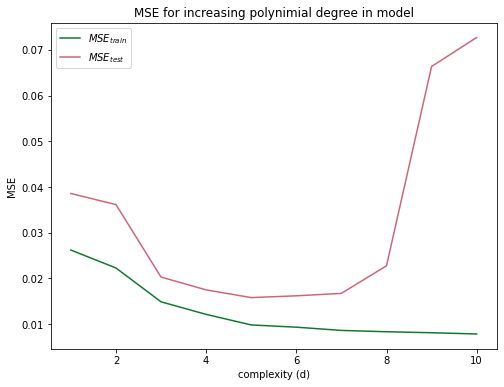

In [119]:
ols_model = ols.OrdinaryLeastSquares()
bias_var_with_bootstrap(ols_model,B=1000,n=25,max_degree=10)

As expected the error on the training set can be reduced indefinitely by increasing the model complexity, but the error on the test set shows the overfitting that is happening. This matches what we saw for the bias-variance trade-off. The bias is reduced with model complexity, but the variance will increase.

In [99]:
from importlib import reload
reload(cd)

<module 'Code.CreateData' from 'C:\\Users\\emili\\Documents\\Studier\\fys-stk3155\\Exercises\\FYS-STK3155\\Project1\\Code\\CreateData.py'>

# Discussion

# Conclusion

# Bibliography
[1] USGSs (the United States Geological Survey) EarthExplorer tool - https://earthexplorer.usgs.gov/

[2] Franke, R. (1979). A critical comparison of some methods for interpolation of scattered data

[3] SciKit-learn: https://scikit-learn.org/stable/index.html

[4] Numpy: https://numpy.org/

[5] MatPlotLib.PyPlot: https://matplotlib.org/api/pyplot_api.html

[6] Python.random: https://docs.python.org/3/library/random.html